In [6]:
# Importing all the library

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler


In [7]:
#uploading dataset and visualising the dataset
dataset= pd.read_csv('iris.csv.csv')
dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


#INFORMATION ABOUT THE DATASET


In [8]:
dataset.describe()
 
    

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [9]:
dataset.shape

(150, 6)

In [10]:
#checking the null values
dataset.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [11]:
# checking not null values
dataset.notnull().sum()


Id               150
SepalLengthCm    150
SepalWidthCm     150
PetalLengthCm    150
PetalWidthCm     150
Species          150
dtype: int64

In [12]:
# datatype of each attribute
dataset.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [13]:
# colums attibutes
print(dataset.columns)

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')


In [14]:
# drop column id 
dataset=dataset.drop("Id",axis=1)
dataset.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


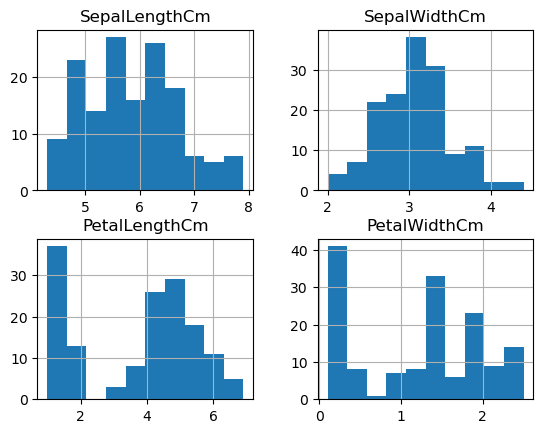

In [15]:
# histrogram of each attribute
dataset.hist()
plt.show()

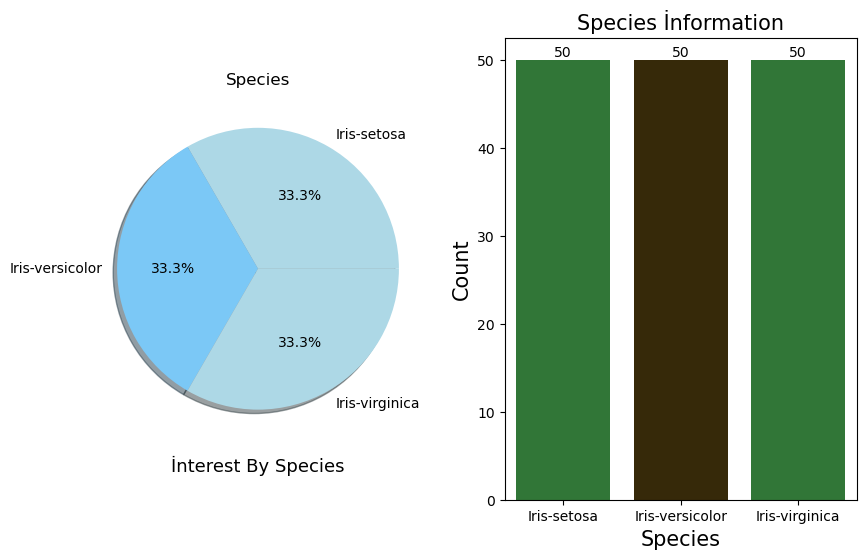

In [16]:
# pie chart and count chart
countspecies=dataset[["Species"]].value_counts().reset_index(name="Count").replace({0:"Iris-setosa",1:"Iris-versicolor",2:"Iris-virginica"})
species=countspecies["Species"].tolist()
count=countspecies["Count"].tolist()

plt.figure(figsize=(10,6))       # figure size decresing
plt.subplot(1,2,1)
explode=[0.1,0.0]
palette=sns.color_palette(["#ADD8E6","#7BC8F6"])
plt.pie(count,labels=species,autopct="%1.1f%%",colors=palette,shadow=True)
plt.title("Species")
plt.xlabel("İnterest By Species",size=13)

plt.subplot(1,2,2)
ax=sns.countplot(data=dataset,x="Species",palette=sns.color_palette(["#25812E","#3D2C02"]));
for i in ax.containers:
    ax.bar_label(i)
plt.xticks([0,1,2],["Iris-setosa","Iris-versicolor","Iris-virginica"]);
plt.title("Species İnformation",size=15)
plt.xlabel("Species",size=15);
plt.ylabel("Count",size=15);
plt.show()

<AxesSubplot:xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

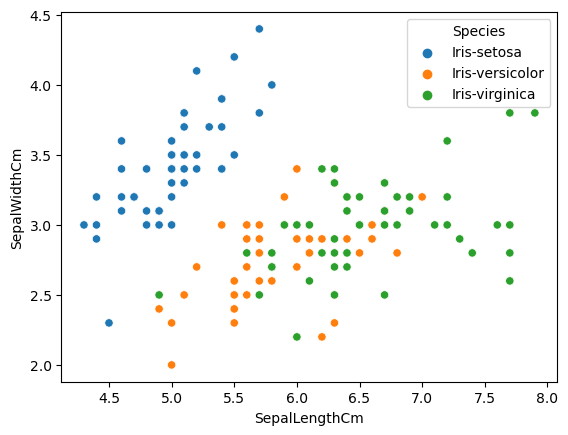

In [44]:
#Scatterplot
sns.scatterplot(data=dataset,x='SepalLengthCm',y='SepalWidthCm',hue='Species')

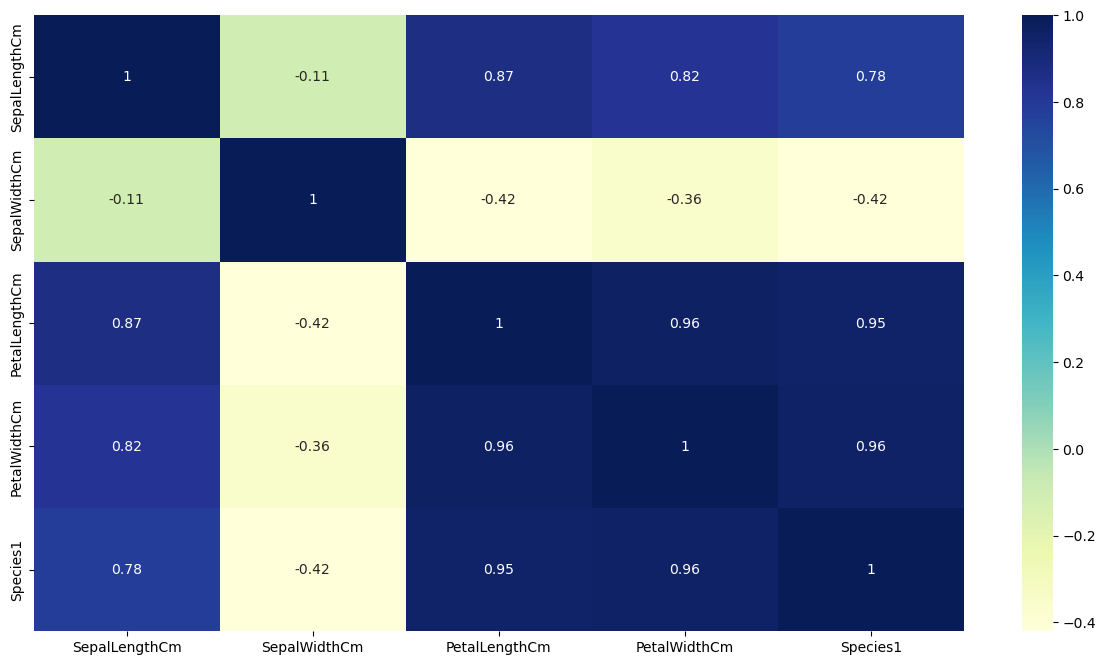

In [65]:
#corelation of each variable
plt.figure(figsize=(15,8))
sns.heatmap(dataset.corr(),annot=True,cmap="YlGnBu")
plt.show()

In [26]:
#ordinal encoding
species_map={"Iris-setosa":0,
            "Iris-versicolor":1,
            "Iris-virginica":2}

dataset['Species1']=dataset.Species.map(species_map)
dataset.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Species1
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0


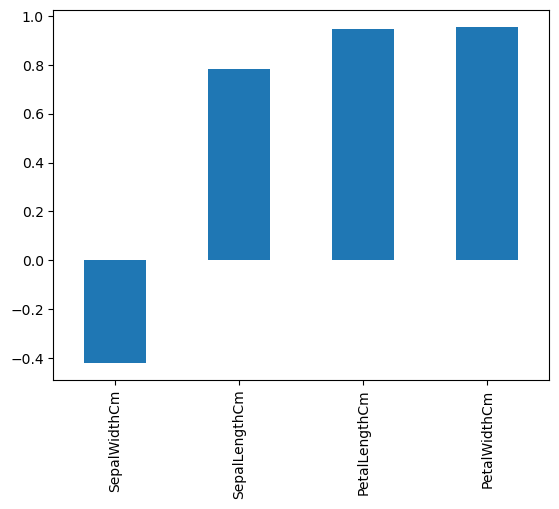

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [18]:
#co-relation of species with attributes
dataset.corr()['Species1'][:-1].sort_values().plot(kind='bar')
plt.show()
dataset.drop("Species1",axis=1)

In [47]:
#dividing the dataset test and train data
x=dataset.drop( 'Species',axis=1)    
y=dataset['Species']

In [55]:
#Spilitting the data into test and train data

x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.30, stratify =y,random_state=2)


In [51]:
#Appling logistic regression algorithm
pt= LogisticRegression()
pt.fit(x_train,y_train)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [56]:
pt_pred =pt.predict(x_test)

In [57]:
#Accuracy of  this algorithm

from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print("Accuracy:" ,accuracy_score(pt_pred,y_test)*100)

Accuracy: 100.0


In [59]:
#confusion matrix
confusion_matrix (pt_pred,y_test)

array([[15,  0,  0],
       [ 0, 15,  0],
       [ 0,  0, 15]], dtype=int64)

In [60]:
print(classification_report(pt_pred,y_test))


                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       1.00      1.00      1.00        15
 Iris-virginica       1.00      1.00      1.00        15

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45

